# Visualizing FordGoBike Data(2019)
##  by Apurva Verma


## Introduction
FordGoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California. Beginning operation in August 2013 as Bay Area Bike Share, the Ford GoBike system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. In this project, I will perform an exploratory analysis of data provided by Ford GoBike, a bike-share system provider for the year 2019.

## Table of content:
1. Gathering data  
2. Analyzing data   
3. Cleaning data    
4. Visualizing data 

## Investigation Overview
In this investigation, I wanted to look at the customer behaviour characteristics of the bay Area bike share system. The main focus was on the time i.e. month, weekday and hour.

## Gathering Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob

%matplotlib inline


In [2]:
# appending all the monthly csv files for 2019 
folder_name = 'Trip'
frames = [pd.read_csv(f) for f in glob.glob(os.path.join(folder_name, '*tripdata.csv'))]
result = pd.concat(frames, ignore_index=True)
print(result.shape)
result.sample(5)

C:\Users\hp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\hp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\hp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


(2506983, 15)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
950946,1609,2019-05-17 17:14:44.2140,2019-05-17 17:41:33.5440,81.0,Berry St at 4th St,37.775880,-122.393170,131.0,22nd St at Dolores St,37.755000,-122.425728,1954,Subscriber,No,NaN
1564581,1550,2019-08-22 18:50:15.3410,2019-08-22 19:16:06.0640,97.0,14th St at Mission St,37.768265,-122.420110,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,9677,Subscriber,No,NaN
1760055,136,2019-09-24 17:57:03.9600,2019-09-24 17:59:20.1020,310.0,San Fernando St at 4th St,37.335885,-121.885660,279.0,Santa Clara St at 7th St,37.339146,-121.884105,1838,Subscriber,Yes,NaN
629777,177,2019-03-01 09:10:03.8070,2019-03-01 09:13:01.0930,27.0,Beale St at Harrison St,37.788059,-122.391865,50.0,2nd St at Townsend St,37.780526,-122.390288,4389,Subscriber,No,NaN
1917423,320,2019-09-03 18:55:47.5060,2019-09-03 19:01:07.7810,66.0,3rd St at Townsend St,37.778742,-122.392741,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,9682,Subscriber,No,NaN


## Analyzing the data

In [3]:
df= result

In [4]:
df.sample(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
896766,740,2019-05-28 12:48:58.0640,2019-05-28 13:01:18.0860,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,25.0,Howard St at 2nd St,37.786928,-122.398113,2461,Subscriber,No,NaN
1667700,1398,2019-08-08 06:56:00.5770,2019-08-08 07:19:19.3810,380.0,Masonic Ave at Turk St,37.779047,-122.447291,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,1591,Subscriber,No,NaN
593945,422,2019-03-06 18:20:01.6750,2019-03-06 18:27:04.5810,176.0,MacArthur BART Station,37.828410,-122.266315,210.0,45th St at Manila,37.833294,-122.256224,371,Subscriber,No,NaN
1849464,1159,2019-09-12 17:13:52.2030,2019-09-12 17:33:11.7320,123.0,Folsom St at 19th St,37.760594,-122.414817,419.0,Fern St at Polk St,37.788197,-122.420373,10025,Subscriber,No,NaN
2406907,1167,2019-12-15 11:14:06.2710,2019-12-15 11:33:33.9200,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,123.0,Folsom St at 19th St,37.760594,-122.414817,9850,Subscriber,NaN,NaN
2195623,1355,2019-11-23 13:10:40.7720,2019-11-23 13:33:16.6340,271.0,San Pablo Park,37.855783,-122.283127,240.0,Haste St at Telegraph Ave,37.866043,-122.258804,12225,Customer,No,NaN
2295317,413,2019-11-09 11:50:43.8070,2019-11-09 11:57:37.7520,81.0,Berry St at 4th St,37.775880,-122.393170,104.0,4th St at 16th St,37.767045,-122.390833,10058,Subscriber,No,NaN
2448328,404,2019-12-06 22:38:45.3200,2019-12-06 22:45:29.8180,364.0,China Basin St at 3rd St,37.772000,-122.389970,126.0,Esprit Park,37.761634,-122.390648,586,Subscriber,NaN,NaN
1364931,662,2019-07-10 09:35:10.6820,2019-07-10 09:46:13.3540,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,16.0,Steuart St at Market St,37.794130,-122.394430,608,Subscriber,No,NaN
1388013,902,2019-07-05 22:16:29.4290,2019-07-05 22:31:32.3830,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,823,Customer,No,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 286.9+ MB


In [6]:
#checking for duplicates
sum(df.duplicated())

0

In [7]:
df.isna().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id             80734
start_station_name           80133
start_station_latitude           0
start_station_longitude          0
end_station_id               82902
end_station_name             82350
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip     243259
rental_access_method       2386145
dtype: int64

## Cleaning

In [8]:
df1=df.copy()

**Changing to correct datatypes for multiple columns**

In [9]:
df1['start_station_id']=df1['start_station_id'].astype('str')
df1['user_type'] = df1['user_type'].astype('category')
df1['bike_share_for_all_trip'] = df1['bike_share_for_all_trip'].astype('category')
df1['rental_access_method'] = df1['rental_access_method'].astype('category')
df1['bike_id'] = df1['bike_id'].astype('str')
df1['start_time'] = pd.to_datetime(df1['start_time'])
df1['end_time']=pd.to_datetime(df1['end_time'])

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  bike_share_for_all_trip  category      
 14  rental_access_method     category      
dtypes: category(3), datetime64[ns](2), float64(5), int64(1), object(4)
memory usage: 236.7+ MB


# Univariate exploration

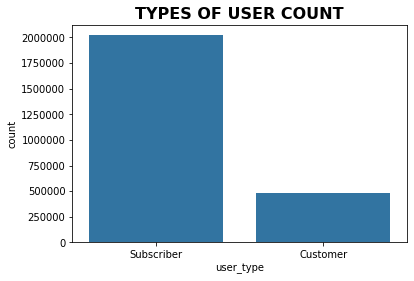

In [11]:
base_color= sb.color_palette()[0]
type_order = df['user_type'].value_counts().index
sb.countplot(data=df, x='user_type', color=base_color,order=type_order);
plt.title("TYPES OF USER COUNT",fontweight='bold', fontsize=16);

### Subscribers seem to use the service of bike rides more than the Customers. Subsrcibers usage are around 3 times more than the Customers

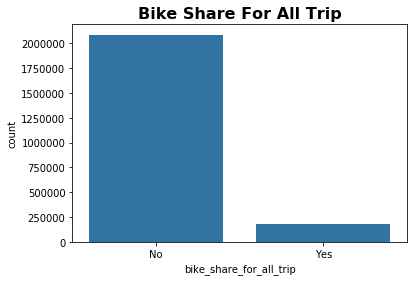

In [12]:
shared_order = df1['bike_share_for_all_trip'].value_counts().index
sb.countplot(data=df1, x='bike_share_for_all_trip', color=base_color,order=shared_order);
plt.title("Bike Share For All Trip",fontweight='bold', fontsize=16);

### Almost 90% of the users does not share the bike for all trips. The users did not prefer bike share option.


In [37]:
df1['dur_min'].describe()

count    2.506983e+06
mean     1.296946e+01
std      3.291311e+01
min      1.000000e+00
25%      5.000000e+00
50%      9.000000e+00
75%      1.400000e+01
max      1.520100e+04
Name: dur_min, dtype: float64

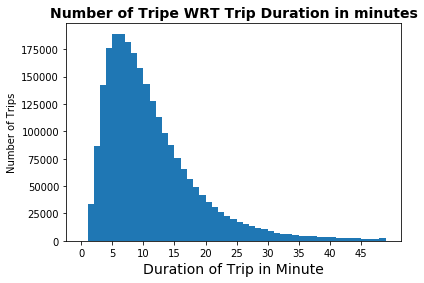

In [17]:
bins = np.arange(0, 50, 1)
ticks = np.arange(0, 50, 5)
plt.hist(data=df1, x='dur_min', bins=bins);
plt.xticks(ticks, ticks);
plt.ylabel('Number of Trips');
plt.xlabel('Duration of Trip in Minute', fontsize=14);
plt.title("Number of Tripe WRT Trip Duration in minutes", fontweight='bold',fontsize=14);

### Most of the trip duration last within the range of 5-10 minutes. Also almost none of them are used for more that a hour.

In [18]:
 sum(df1['rental_access_method'].isna())
 #Most of the values are null here.   

2386145

In [20]:
df1['rental_access_method'].value_counts()
#Column is of no use for us

app        108010
clipper     12828
Name: rental_access_method, dtype: int64

In [21]:
# To Create new columns which we can use to visualize the dataframe.
df1['start_date'] = df1.start_time.dt.strftime('%Y-%m-%d')
df1['start_hour'] = df1.start_time.dt.strftime('%H')
df1['day_week'] = df1.start_time.dt.strftime('%A')
df1['start_month'] = df1.start_time.dt.strftime('%B')
df1['dur_min'] = df1['duration_sec']/60
df1['dur_min'] = df1['dur_min'].astype(int)
df1.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,start_date,start_hour,day_week,start_month,dur_min
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN,2019-01-31,17,Thursday,January,1347
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN,2019-01-31,20,Thursday,January,1098
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN,2019-01-31,18,Thursday,January,1043
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN,2019-01-31,19,Thursday,January,744
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN,2019-01-31,14,Thursday,January,1011


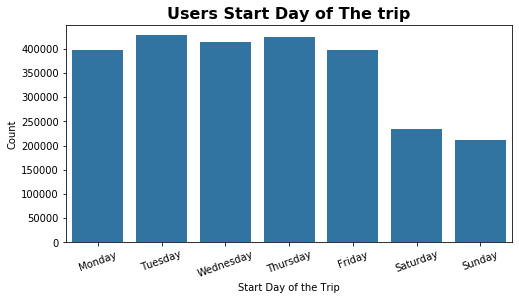

In [22]:
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df1['day_week'] = df1['day_week'].astype(weekdaycat)
plt.subplots(figsize = (8,4))
sb.countplot(data=df1, x='day_week', color=base_color);
plt.title('Users Start Day of The trip',fontweight='bold', fontsize=16);
plt.xlabel('Start Day of the Trip');
plt.ylabel('Count');
plt.xticks(rotation=20);

### Tuesday and Thursday have the highest frequency of users as a Start Day of Trip. While the weekends have the lowest number of users.

In [23]:
df1['start_month'].value_counts()

July         258102
March        256299
October      239895
April        239111
September    217986
August       210563
January      192082
June         191772
November     185496
February     183412
May          182163
December     150102
Name: start_month, dtype: int64

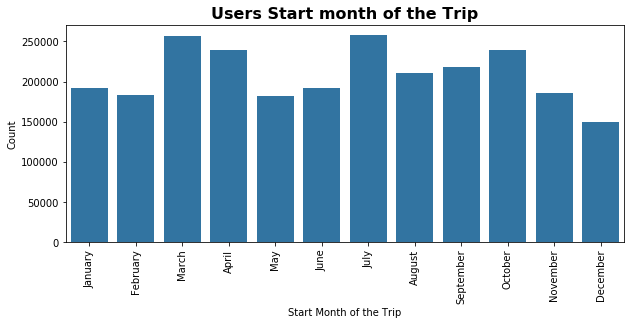

In [24]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
months_cat = pd.api.types.CategoricalDtype(ordered=True, categories=months)
df1['start_month'] = df1['start_month'].astype(months_cat)
plt.subplots(figsize = (10,4))
sb.countplot(data=df1, x='start_month', color=base_color);
plt.title('Users Start month of the Trip',fontweight='bold', fontsize=16);
plt.xlabel('Start Month of the Trip');
plt.ylabel('Count');
plt.xticks(rotation=90);

### April and July are the months when the user count is the most while December has the lowest count

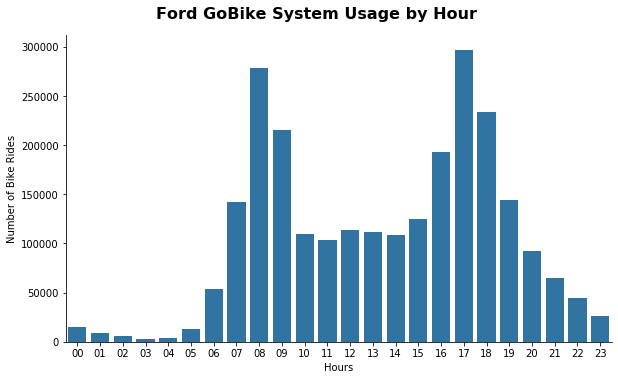

In [25]:
# Hourly usage of the Ford Go Bike System
graph = sb.catplot(data = df1, x='start_hour', kind='count', color = base_color, aspect = 1.7)
graph.set_axis_labels('Hours', 'Number of Bike Rides')
graph.fig.suptitle('Ford GoBike System Usage by Hour', y=1.05, fontsize=16, fontweight='bold');

### The morning that is at 8am and the evening 5pm are the hours where the bikes are most used.

## Bivariate exploration

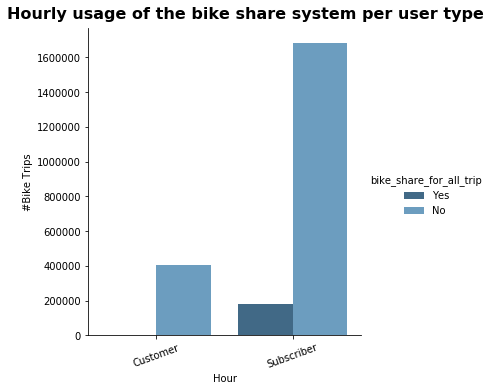

In [26]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday
df_hr = sb.catplot(data=df1, x='user_type', hue='bike_share_for_all_trip',hue_order=['Yes','No'], kind='count', sharey = False,palette="Blues_d")
df_hr.set_axis_labels("Hour", "#Bike Trips")
df_hr.set_titles("{col_name}")
df_hr.fig.suptitle('Hourly usage of the bike share system per user type', y=1.03, fontsize=16, fontweight='bold');
plt.xticks(rotation=20);


### Around 200000 Subscribers and none of the Customers use the bike for all trip. While more than 1600000 Subscribers and only 400000 Customers share their bike for all trip.


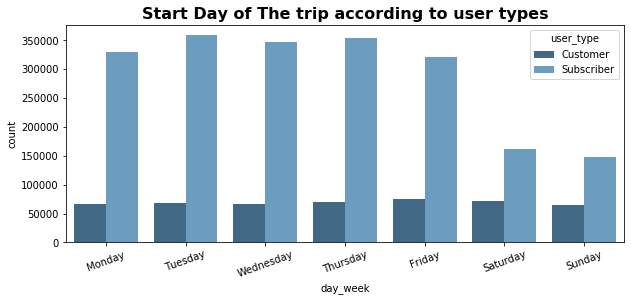

In [27]:
;# Customer Usage by Weekday vs. Subscriber Usage by Weekday
plt.subplots(figsize = (10,4))
sb.countplot(data= df1, x='day_week', hue='user_type',palette="Blues_d");
plt.title('Start Day of The trip according to user types',fontweight='bold', fontsize=16);
plt.xticks(rotation=20);

### For every day of week the Subscriber usage is more than Customer's bike usage. Also it is very evident here that the Customer's usage is nearly constant without much fluctuations for all days of the week.


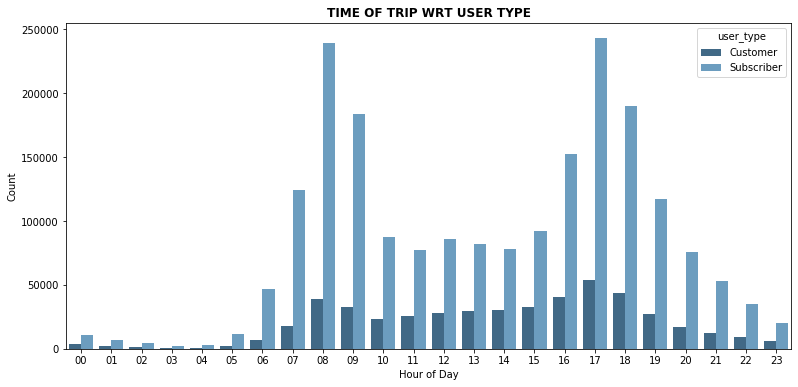

In [28]:
# Time distribution wrt users
plt.subplots(figsize = (13,6))
sb.countplot(data=df1, x='start_hour', hue='user_type', palette="Blues_d")
plt.title('TIME OF TRIP WRT USER TYPE',fontweight='bold')
plt.xlabel('Hour of Day')
plt.ylabel('Count');


### Subscribers usage of the bikes is obviously at the rush hours , this provides evidence that they use the service on the purpose of going to work. The customers tend to ride most in the noon or evenings.

## Multivariate Exploration

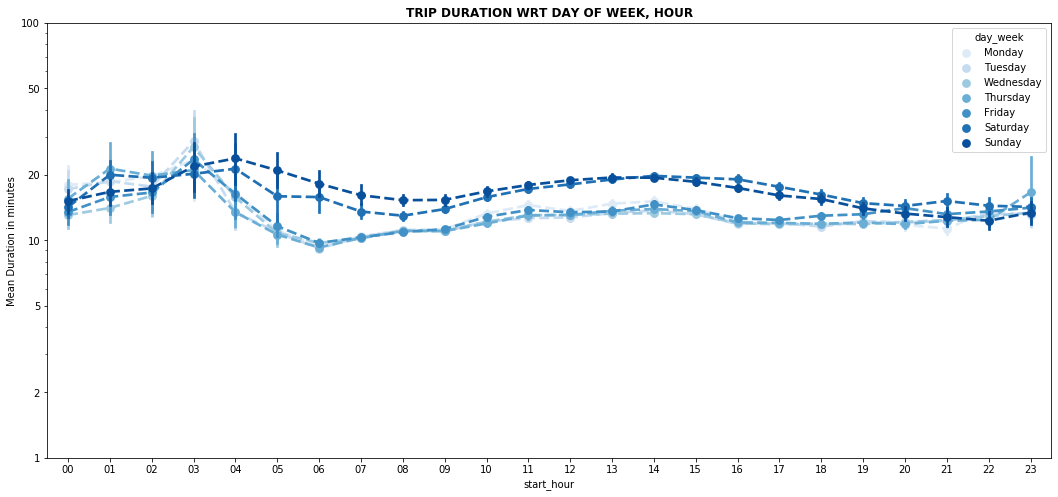

In [31]:
plt.subplots(figsize = (18,8))
ax = sb.pointplot(data = df1, x = 'start_hour', y = 'dur_min', hue = 'day_week',palette = 'Blues', linestyles = '--')
plt.title('TRIP DURATION WRT DAY OF WEEK, HOUR', fontweight='bold')
plt.ylabel('Mean Duration in minutes')
plt.yscale('log')
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100])
ax.set_yticklabels([],minor = True);


### Subscribers rides are much shorter compared to those of the customers on everyday of the week. The trend line seems to increase on weekends, especially for customer user type .

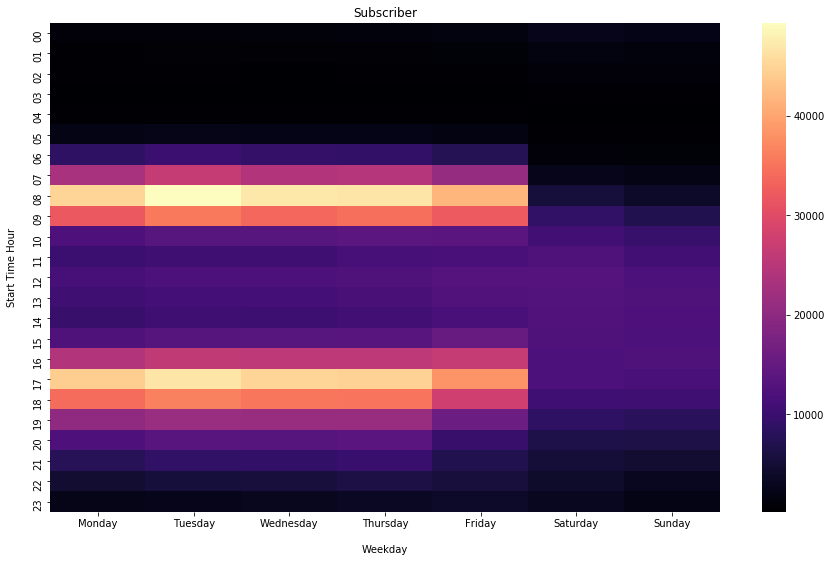

In [32]:
# Heatmap - Subscribers
plt.figure(figsize=(15,9))
df_sub = df1.query('user_type == "Subscriber"').groupby(['start_hour', 'day_week'])['bike_id'].size().reset_index();
df_sub = df_sub.pivot('start_hour', 'day_week', 'bike_id')
hot_map = sb.heatmap(df_sub, cmap = 'magma')
plt.title("Subscriber", y=1.05)
plt.xlabel('Weekday', labelpad = 16)
plt.ylabel('Start Time Hour', labelpad = 16);
plt.show()

### The heatmap represents the Subscribers weekly distribution for Start Time of the hour. Most of the Subscribers prefer to start their ride between 7-9am in morning and 4-6pm at evening. Weekend activity of Subscribers are not very strong.

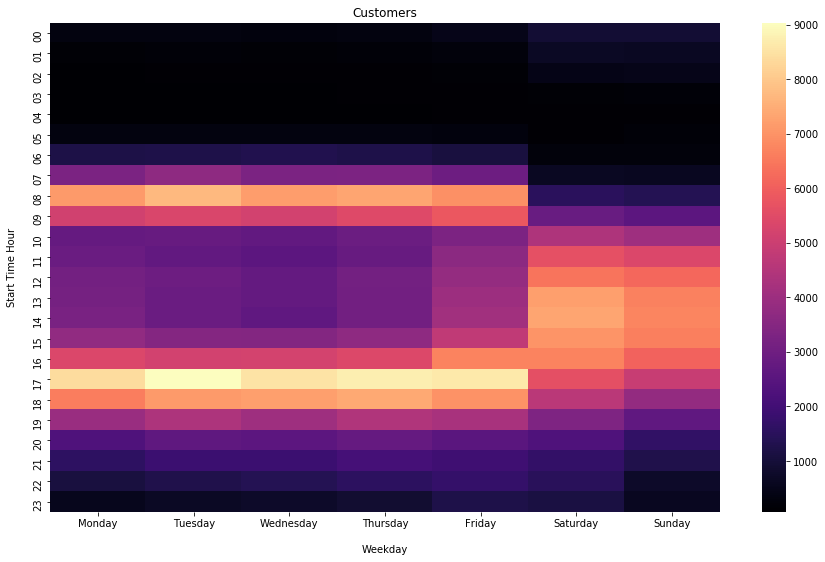

In [33]:
# Heatmap - Subscribers
plt.figure(figsize=(15,9))
df_cus = df1.query('user_type == "Customer"').groupby(['start_hour', 'day_week'])['bike_id'].size().reset_index();
df_cus = df_cus.pivot('start_hour', 'day_week', 'bike_id')
hot_map = sb.heatmap(df_cus, cmap = 'magma')
plt.title("Customers", y=1.05)
plt.xlabel('Weekday', labelpad = 16)
plt.ylabel('Start Time Hour', labelpad = 16);
plt.show()

### The heatmap represents the Customers weekly distribution for Start Time of the hour. Most of the Customers prefer to start their ride between 8-9am in morning and 4-7pm at evening. Also during weekends they ride between 11am-6pm.

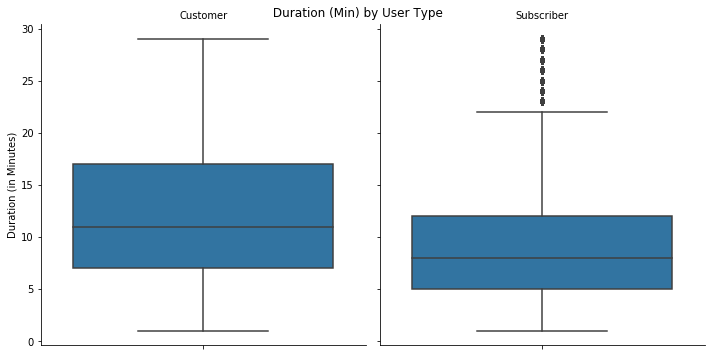

In [34]:
data_ = df1.query('dur_min < 30')
g = sb.catplot(data=data_, y='dur_min', col="user_type", kind='box');
g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Duration (in Minutes)")
g.fig.suptitle(' Duration (Min) by User Type');

In [35]:
df1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,start_date,start_hour,day_week,start_month,dur_min
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN,2019-01-31,17,Thursday,January,1347
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN,2019-01-31,20,Thursday,January,1098
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN,2019-01-31,18,Thursday,January,1043
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN,2019-01-31,19,Thursday,January,744
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN,2019-01-31,14,Thursday,January,1011


<Figure size 841.68x595.44 with 0 Axes>

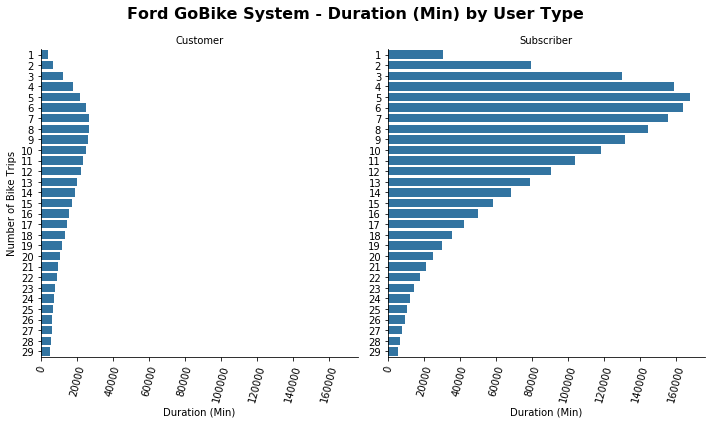

In [36]:
# Customer Usage by Duration vs. Subscriber Usage by Duration
plt.figure(figsize=[ 11.69, 8.27]);

data = df1.query('dur_min < 30')

graph = sb.catplot(data=data, y = 'dur_min', col='user_type', kind='count', sharey = False, color = base_color);

graph.set_axis_labels('Duration (Min)', 'Number of Bike Trips')
graph.set_titles('{col_name}')

graph.fig.suptitle('Ford GoBike System - Duration (Min) by User Type', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

### By comparing both the box plots we conclude that the ride duration(in minutes) for Customer typically have trip durations that are longer (8 to 18 minutes ) than for subscribers (5 to 12 ).

# CONCLUSIONS 
### In this project I've investigated the dataset of FordGoBike Data for the year 2019(January-December) and from the visualization drawn few conclusion listed below.
1. From the two user types of FordGoBike data, the counts of Subscribers are around 3 times more than the Customers.

2. 90% of the users tend to share their bike for all trips in which only Subscribers contribute. None of the Customers tend to share their bike for all trips.

3. As a Start Day of the Trip, Tuesday and Thursday have the highest frequency of users. While the weekends have the lowest number of users.

4. April and July are the months when the user count is the most while December has the lowest count.

5. Most of the trip duration last within the range of 5-10 minutes.

6. For different hours of the day, at 8am in morning and the evening 5pm are the hours where the bikes are most used by the users.

7. Subscribers rides are much shorter compared to those of the customers on everyday of the week. The trend line seems to increase on weekends, especially for customer user type .

8. The heatmap represents the Subscribers weekly distribution for Start Time of the hour. Most of the Subscribers prefer to start their ride between 7-9am in morning and 4-6pm at evening. Weekend activity of Subscribers are not very strong. The Customers weekly distribution for Start Time of the hour. Most of the Customers prefer to start their ride between 8-9am in morning and 4-7pm at evening. Also during weekends they ride between 11am-6pm.

9. Most of the trip duration last within the range of 5-10 minutes. Also almost none of them are used for more that a hour. The box plots we have conclude that the ride duration(in minutes) for Customer typically have trip durations that are longer (8 to 18 minutes ) than for subscribers (5 to 12 ).

## Limitations
1. The rental_access_method column does not have enough values to draw some conclusion from them.
2. The Gender wise bike distribution could give a more percise insights for the data.
3. Overlaying external data sources onto this data set such as traffic or weather could allow us to better understand influencers on number of users.

## References
Numpy Documentation  
Stack Overflow  
MatplotLib Documenation

In [ ]:
!jupyter nbconvert Visual1.ipynb --to slides --template output-toggle-Copy1.tpl --post serve